In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns

In [5]:
data = pd.read_csv('wnba.csv')
data.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [8]:
data['Experience'].value_counts(dropna=False)

R     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [11]:
pd.isnull(np.nan)

True

In [18]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 0<x<=3:
        return "Little Experienced"
    elif 3<x<=5:
        return "Experienced"
    elif 5<x<=10:
        return "Very Experienced"
    elif x>10:
        return "Veteran"

In [19]:
data['Experience'].dtype

dtype('O')

In [21]:
data['Ord_Exp'] = pd.to_numeric(data['Experience'], errors='coerce').apply(category)

In [24]:
value = data['Ord_Exp'].value_counts().iloc[[3,0,2,1,4]]

In [25]:
value

Rookie                23
Little Experienced    42
Experienced           25
Very Experienced      37
Veteran               16
Name: Ord_Exp, dtype: int64

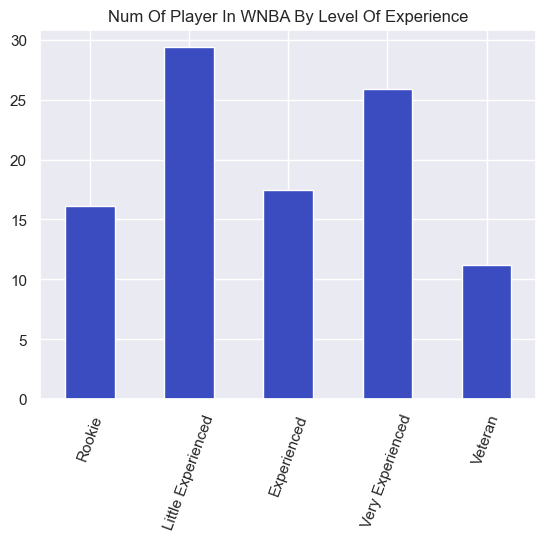

In [49]:
sns.set()
value.plot(kind='bar',colormap=pyp.cm.coolwarm,rot=70,\
          title='Num Of Player In WNBA By Level Of Experience')
pyp.show()

In [33]:
value = (data['Ord_Exp'].value_counts(normalize=True)*100).iloc[[3,0,2,1,4]]
value

Rookie                16.083916
Little Experienced    29.370629
Experienced           17.482517
Very Experienced      25.874126
Veteran               11.188811
Name: Ord_Exp, dtype: float64

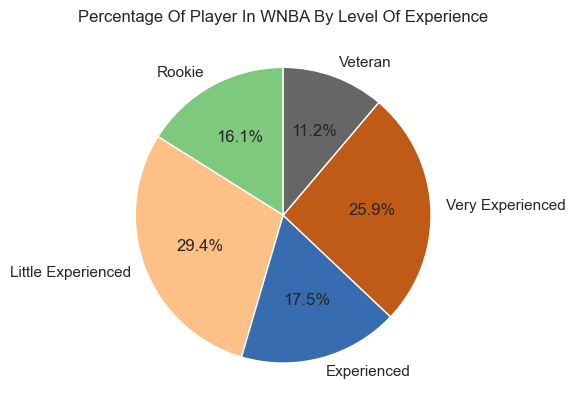

In [41]:
sns.set()
value.plot(kind='pie',colormap=pyp.cm.Accent,rot=70,\
          startangle=90,title='Percentage Of Player In WNBA By Level Of Experience',autopct='%.1f%%')
pyp.ylabel("")
pyp.show()

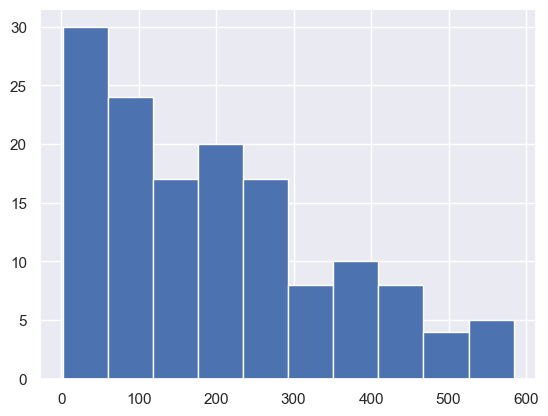

In [44]:
data['PTS'].hist()
pyp.show()

In [46]:
data['PTS'].value_counts(bins=10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(118.4, 176.6]    17
(234.8, 293.0]    17
(351.2, 409.4]    10
(293.0, 351.2]     8
(409.4, 467.6]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

In [52]:
value.index

Index(['Rookie', 'Little Experienced', 'Experienced', 'Very Experienced',
       'Veteran'],
      dtype='object')

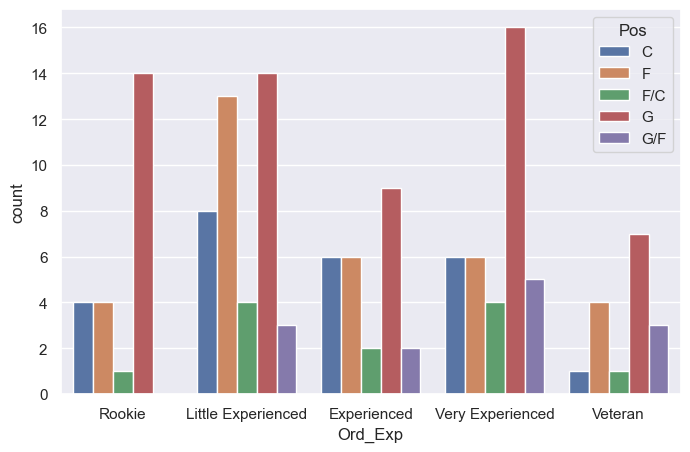

In [55]:
fig = pyp.figure(figsize=(8,5))

sns.countplot(x='Ord_Exp',data=data,order=['Rookie', 'Little Experienced', 'Experienced', 'Very Experienced',
       'Veteran'],hue='Pos',hue_order=['C','F','F/C','G','G/F'])
pyp.show()

In [57]:
data['MIN'].mean()

496.97202797202794

In [58]:
data['Age'].mean()

27.076923076923077

In [59]:
data['min_mean_relative'] = data['MIN'].apply(lambda x: "Avg OR Above" if x>497 else "Below Avg")

In [60]:
data[['MIN','min_mean_relative']]

,MIN,min_mean_relative
0,173,Below Avg
1,947,Avg OR Above
2,617,Avg OR Above
3,721,Avg OR Above
4,137,Below Avg
...,...,...
138,861,Avg OR Above
139,127,Below Avg
140,671,Avg OR Above
141,952,Avg OR Above


In [61]:
data['age_mean_relative'] = data['Age'].apply(lambda x: "Old" if x>27 else "Young")

In [62]:
data[['Age','age_mean_relative']]

,Age,age_mean_relative
0,23,Young
1,35,Old
2,26,Young
3,28,Old
4,23,Young
...,...,...
138,27,Young
139,32,Old
140,32,Old
141,29,Old


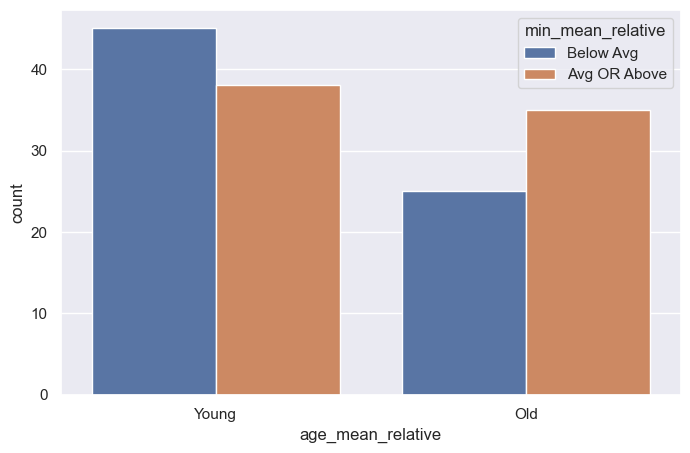

In [64]:
fig = pyp.figure(figsize=(8,5))
sns.countplot(x='age_mean_relative',data=data,hue='min_mean_relative')
pyp.show()